In [4]:
# ==========================================================
# 1. INTRODUCTION
# ==========================================================
# This notebook explores the raw tennis dataset.
# Goal: assess data quality and identify insights useful for
# preprocessing and model building.

In [1]:
# ==========================================================
# 2. IMPORT LIBRARIES
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [6]:

# ==========================================================
# 3. LOAD DATASET
# ==========================================================
# Update the path with your raw CSV file
file_path = "../data/raw/atp_tennis.csv"
df = pd.read_csv(file_path)

# First inspection
display(df.head())
print(df.info())
print(df.describe(include="all"))


,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66279 entries, 0 to 66278
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  66279 non-null  object 
 1   Date        66279 non-null  object 
 2   Series      66279 non-null  object 
 3   Court       66279 non-null  object 
 4   Surface     66279 non-null  object 
 5   Round       66279 non-null  object 
 6   Best of     66279 non-null  int64  
 7   Player_1    66279 non-null  object 
 8   Player_2    66279 non-null  object 
 9   Winner      66279 non-null  object 
 10  Rank_1      66279 non-null  int64  
 11  Rank_2      66279 non-null  int64  
 12  Pts_1       66279 non-null  int64  
 13  Pts_2       66279 non-null  int64  
 14  Odd_1       66279 non-null  float64
 15  Odd_2       66279 non-null  float64
 16  Score       66279 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB
None
         Tournament        Date  Series    C

In [7]:

# ==========================================================
# 4. INITIAL CLEANING
# ==========================================================
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Data types
print(df.dtypes)


Series([], dtype: int64)

Number of duplicates: 0
Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Player_1       object
Player_2       object
Winner         object
Rank_1          int64
Rank_2          int64
Pts_1           int64
Pts_2           int64
Odd_1         float64
Odd_2         float64
Score          object
dtype: object


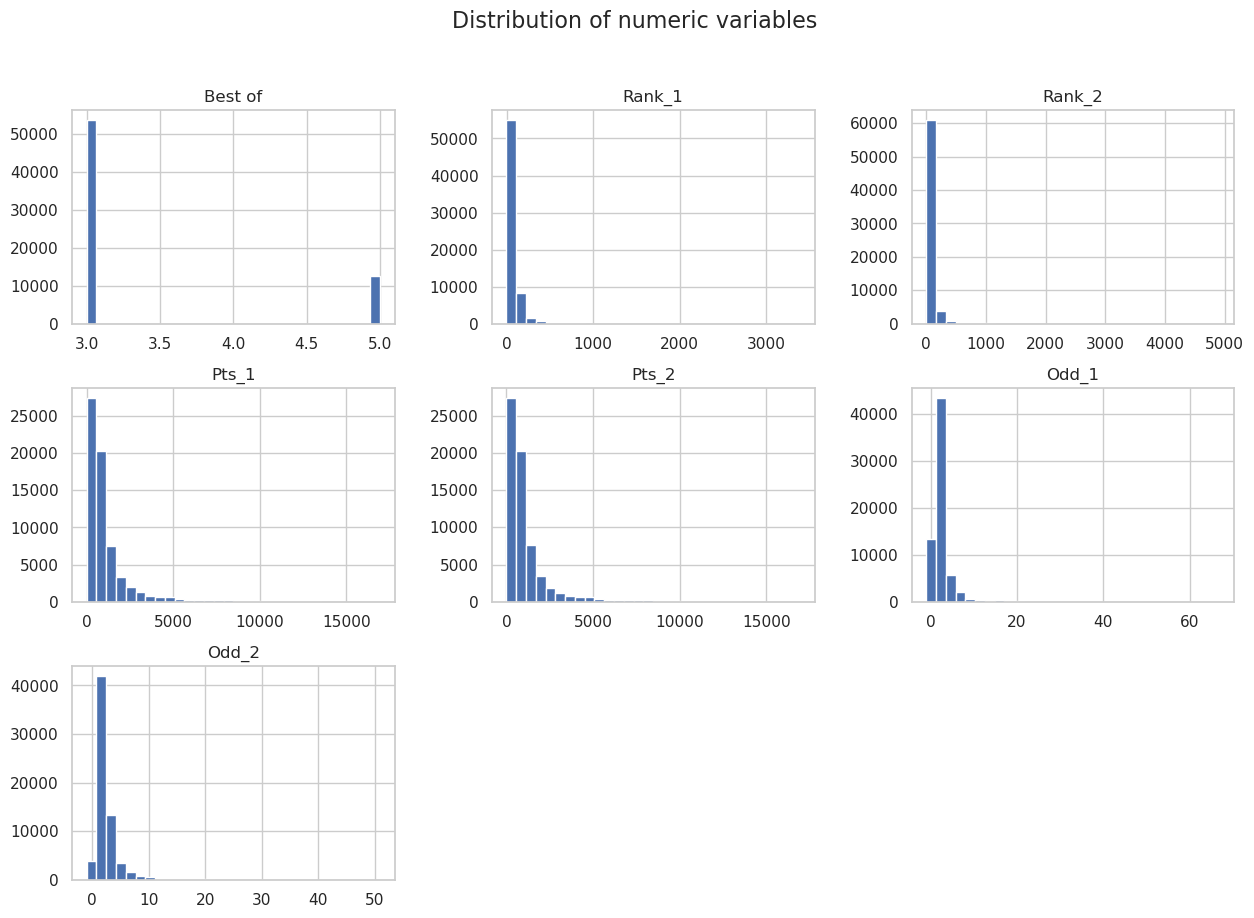


Top values for Tournament:
Tournament
French Open                                   3172
Australian Open                               3155
US Open                                       3124
Wimbledon                                     3061
BNP Paribas Open                              1463
Monte Carlo Masters                           1385
Western & Southern Financial Group Masters    1285
Sony Ericsson Open                            1185
Internazionali BNL d'Italia                   1120
Mutua Madrid Open                              805
Name: count, dtype: int64

Top values for Date:
Date
2001-01-15    125
2000-08-28    124
2001-08-27    124
2002-06-24    124
2000-01-17    124
2000-06-26    123
2002-01-14    122
2002-05-27    122
2001-06-25    121
2001-05-28    121
Name: count, dtype: int64

Top values for Series:
Series
ATP250                17559
Grand Slam            12512
International         11752
Masters 1000           9079
ATP500                 6356
Masters              

In [8]:

# ==========================================================
# 5. UNIVARIATE ANALYSIS
# ==========================================================
# Numeric variables
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of numeric variables", fontsize=16)
plt.show()

# Categorical variables
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols[:5]:  # show first 5 categorical variables
    print(f"\nTop values for {col}:")
    print(df[col].value_counts().head(10))


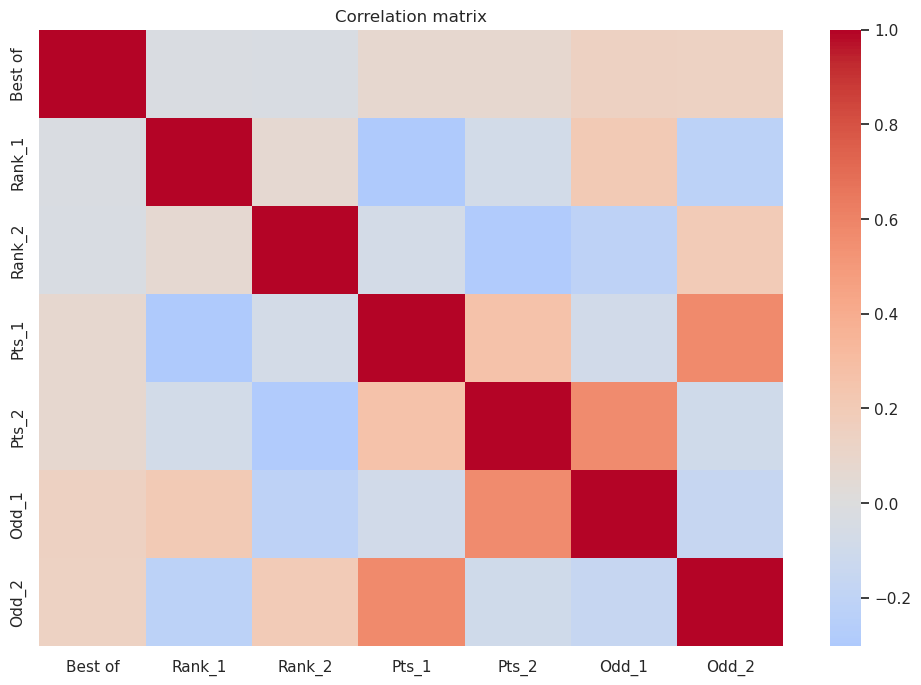

In [9]:

# ==========================================================
# 6. BIVARIATE ANALYSIS
# ==========================================================
# Example: ranking difference vs match outcome
if "winner_rank" in df.columns and "loser_rank" in df.columns:
    df["rank_diff"] = df["loser_rank"] - df["winner_rank"]
    sns.histplot(df["rank_diff"], bins=50, kde=True)
    plt.title("Distribution of ranking difference (loser - winner)")
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()
